## Загрузка датасета и установка зависимостей

In [11]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [12]:
import opendatasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
datasets.download("https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption")

Skipping, found downloaded files in "./fuel-consumption" (use force=True to force download)


In [14]:
df = pd.read_csv("/content/fuel-consumption/Fuel_Consumption_2000-2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


## EDA

Основная информация

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


Пропусков в данных нет

Ключевым признаком будет FUEL CONSUMPTION, а остальные параметры, представляющие расход топлива можно удалить

In [16]:
df.drop(["HWY (L/100 km)", "COMB (L/100 km)", "COMB (mpg)", "EMISSIONS"], axis=1, inplace=True)

Посмотрим, сколько значений принимают параметры MAKE и MODEL

In [17]:
df["MODEL"].describe()

count     22556
unique     4242
top       JETTA
freq         89
Name: MODEL, dtype: object

In [18]:
df["MAKE"].describe()

count         22556
unique           87
top       CHEVROLET
freq           1725
Name: MAKE, dtype: object

MAKE и MODEL имеют слишком много уникальных значений и мало влияют на расход, можно удалить

In [19]:
df.drop(["MAKE", "MODEL"], axis=1, inplace=True)

Зависимость расхода от типа топлива

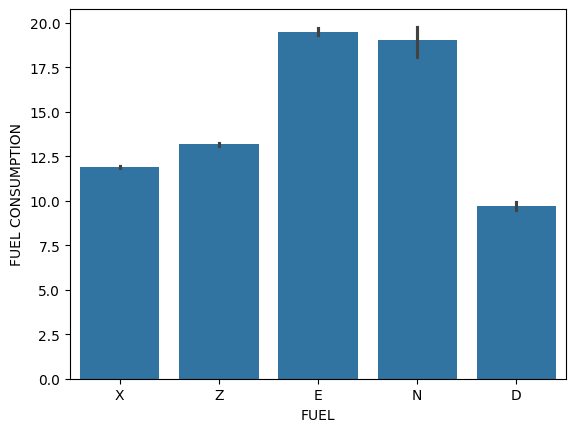

In [20]:
sns.barplot(x='FUEL', y='FUEL CONSUMPTION', data=df);

Видно, что наименьший расход топлива (в литрах) у дизельных двигателей (D), чуть больше у бензиновых (X, Z), а наибольший у двигателей на этаноле и газу (E, N).

Посмотрим, какие встречаются классы автомобилей

In [21]:
df["VEHICLE CLASS"].value_counts()

VEHICLE CLASS
SUV                         2640
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size      

Можно объединить одинаковые классы, которые записаны по-разному (например, Special purpose vehicle и SPECIAL PURPOSE VEHICLE)

In [22]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].str.lower().str.replace(' ', '').str.replace(':', '').str.replace('-', '')

Параметр TRANSMISSION определяет тип коробки передач и кол-во передач, разобьем его на 2 части

In [23]:
df['TRANSMISSION'].value_counts()

TRANSMISSION
A4      3519
AS6     2834
M6      2609
M5      2104
A6      1965
AS8     1733
A5      1420
AS5      865
AV       816
A8       794
AM7      689
AS7      614
A9       529
AS10     335
A7       278
AS4      245
AM6      214
AM8      164
A10      162
AV7      143
AV6      137
M7       130
AS9      110
AV8       78
AV10      25
A3        24
AV1        8
AM5        6
AM9        5
M4         1
Name: count, dtype: int64

In [24]:
df['TRANSMISSION'] = df['TRANSMISSION'].apply(lambda x: x + '0' if x.endswith('V') else x)
df[['TRANSMISSION TYPE', 'TRANSMISSION GEARS']] = df['TRANSMISSION'].str.split('(\d+)', expand=True).iloc[:, :-1]
df['TRANSMISSION GEARS'] = pd.to_numeric(df['TRANSMISSION GEARS'])
df.drop(["TRANSMISSION"], axis=1, inplace=True)

Кажется, что год выпуска слабо влияет на расход, можем удалить

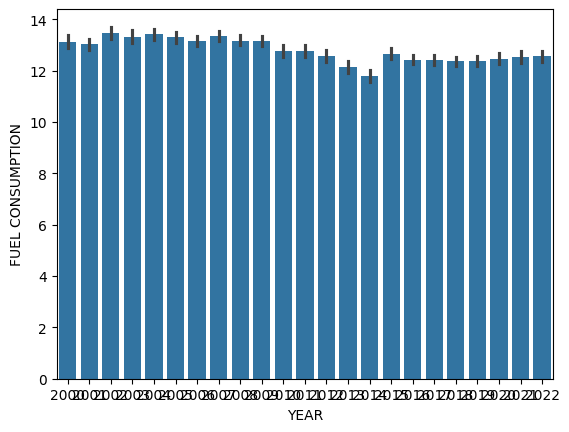

In [25]:
sns.barplot(x='YEAR', y='FUEL CONSUMPTION', data=df);

In [26]:
df.drop(["YEAR"], axis=1, inplace=True)

In [27]:
df["VEHICLE CLASS"].value_counts()

VEHICLE CLASS
compact                  3127
midsize                  2960
suv                      2640
pickuptruckstandard      2204
subcompact               2010
suvsmall                 1756
fullsize                 1503
twoseater                1312
suvstandard              1122
minicompact               994
stationwagonsmall         877
pickuptrucksmall          511
minivan                   408
stationwagonmidsize       387
vancargo                  332
vanpassenger              299
specialpurposevehicle     114
Name: count, dtype: int64

Преобразуем значения в числовые

In [28]:
df['TRANSMISSION TYPE'].replace(['A', 'AS', 'M', 'AV', 'AM'], [0, 1, 2, 3, 4], inplace=True)
df['FUEL'].replace(['X', 'Z', 'E', 'D', 'N'], [0, 1, 2, 3, 4], inplace=True)
df['VEHICLE CLASS'].replace(['compact', 'midsize', 'suv', 'pickuptruckstandard', 'subcompact',
                             'suvsmall', 'fullsize', 'twoseater', 'suvstandard', 'minicompact',
                             'stationwagonsmall', 'pickuptrucksmall', 'minivan', 'stationwagonmidsize',
                             'vancargo', 'vanpassenger', 'specialpurposevehicle'],
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
                            inplace=True)

Матрица корреляции признаков

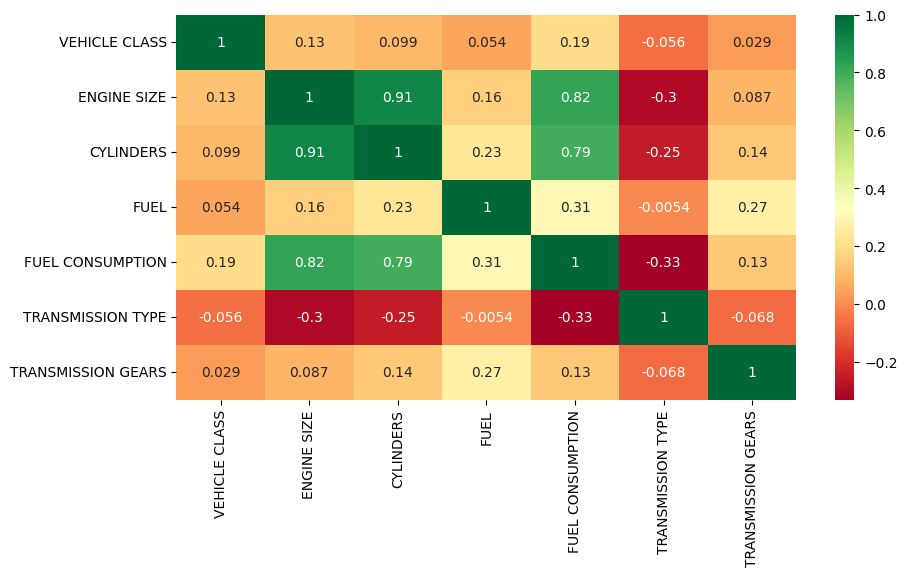

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

По матрице видно, что целевой параметр расхода топлива наиболее сильно кореллирует с объемом двигателя

Так же CYLINDERS и ENGINE SIZE сильно кореллированы, можно удалить CYLINDERS

In [30]:
df.drop("CYLINDERS", axis=1, inplace=True)

Преобразованный датасет

In [31]:
df.head()

,VEHICLE CLASS,ENGINE SIZE,FUEL,FUEL CONSUMPTION,TRANSMISSION TYPE,TRANSMISSION GEARS
0,0,1.6,0,9.2,0,4
1,0,1.6,0,8.5,2,5
2,1,3.2,1,12.2,1,5
3,1,3.5,1,13.4,0,4
4,4,1.8,0,10.0,0,4


## Реализация Bagging и AdaBoost


In [94]:
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
import numpy as np

class SimpleBaggingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator=None, n_estimators=10):
        self.base_estimator = base_estimator if base_estimator is not None else DecisionTreeRegressor()
        self.n_estimators = n_estimators

    def fit(self, X, y):
        self.estimators_ = []
        for _ in range(self.n_estimators):
            estimator = clone(self.base_estimator)
            X_sample, y_sample = resample(X, y)
            estimator.fit(X_sample, y_sample)
            self.estimators_.append(estimator)
        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
        averaged_predictions = np.mean(predictions, axis=0)
        return averaged_predictions


class SimpleAdaBoostRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_estimator=None, n_estimators=50, learning_rate=1.0):
        self.base_estimator = base_estimator if base_estimator is not None else DecisionTreeRegressor(max_depth=3)
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate

    def predict(self, x):
        return np.around(sum(self.alphas[i] * self.estimators_[i].predict(x) for i in range(self.n_estimators)))

    def fit(self, x, y):
        self.estimators_ = []
        self.alphas = [0 for _ in range(self.n_estimators)]
        weight = [1.0 for _ in y]
        for i in range(self.n_estimators):
            est = clone(self.base_estimator)
            est.fit(x, y, weight)
            error = 1 - est.score(x, y, weight)
            self.alphas[i] = np.log((1 - error) / error)
            weight = weight * np.exp(self.alphas[i] * (y != est.predict(x)))
            weight = weight / sum(weight) * len(y)
            self.estimators_.append(est)
        self.alphas /= sum(self.alphas)

## Обучение моделей

In [ ]:
!pip install optuna
!pip install optuna-integration

In [ ]:
!pip install  xgboost lightgbm catboost

In [45]:
import pathlib
import optuna as opt
from sklearn.model_selection import KFold, cross_validate


path = pathlib.Path("result.csv")
X, y = df.drop("FUEL CONSUMPTION", axis=1), df["FUEL CONSUMPTION"]
seed = 777


def train_and_store(estimator, params):
    model = opt.integration.OptunaSearchCV(
        estimator,
        params,
        scoring="r2",
        n_jobs=-1,
        random_state=seed,
        study=opt.create_study(sampler=opt.samplers.BruteForceSampler(seed), direction="maximize"),
    )

    res = cross_validate(
        model,
        X,
        y,
        cv=KFold(shuffle=True, random_state=seed),
        scoring=["r2", "neg_mean_absolute_error"],
        n_jobs=-1,
        return_estimator=True,
    )

    print(estimator.__class__.__name__)
    for fold_i, estimator_in_fold in enumerate(res["estimator"], start=1):
        print(f"Best params #{fold_i}:", estimator_in_fold.best_params_)
    print()

    res = pd.DataFrame(res).rename(
        columns={"estimator": "Regressor", "fit_time": "Fit time, s", "score_time": "Score time, s", "test_r2": "R2/test"}
    )
    res["Regressor"] = estimator.__class__.__name__.removesuffix("Regressor")
    res["MAE/test"] = -res["test_neg_mean_absolute_error"]
    res = res.drop(columns=["test_neg_mean_absolute_error"])
    res.to_csv(path, mode="a", header=not path.exists())

In [ ]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


dist = opt.distributions.CategoricalDistribution
boosting_params = {
    "n_estimators": dist([10, 50, 150]),
    "learning_rate": dist([0.05, 0.1, 0.3, 1])
}
bagging_params = {
    "n_estimators": dist([10, 50, 150])
}
hist_gb_params = {
    "learning_rate": dist([0.05, 0.1, 0.3, 1])
}

train_and_store(BaggingRegressor(random_state=seed), bagging_params)
train_and_store(AdaBoostRegressor(random_state=seed), boosting_params)
train_and_store(RandomForestRegressor(random_state=seed), bagging_params)
train_and_store(GradientBoostingRegressor(random_state=seed), boosting_params)
train_and_store(HistGradientBoostingRegressor(random_state=seed), hist_gb_params)
train_and_store(XGBRegressor(random_state=seed), boosting_params)
train_and_store(LGBMRegressor(random_state=seed), boosting_params)
train_and_store(CatBoostRegressor(random_state=seed), boosting_params)
train_and_store(SimpleBaggingRegressor(), bagging_params)
train_and_store(SimpleAdaBoostRegressor(), boosting_params)

## Сравнение моделей

In [96]:
results = pd.read_csv('result.csv')

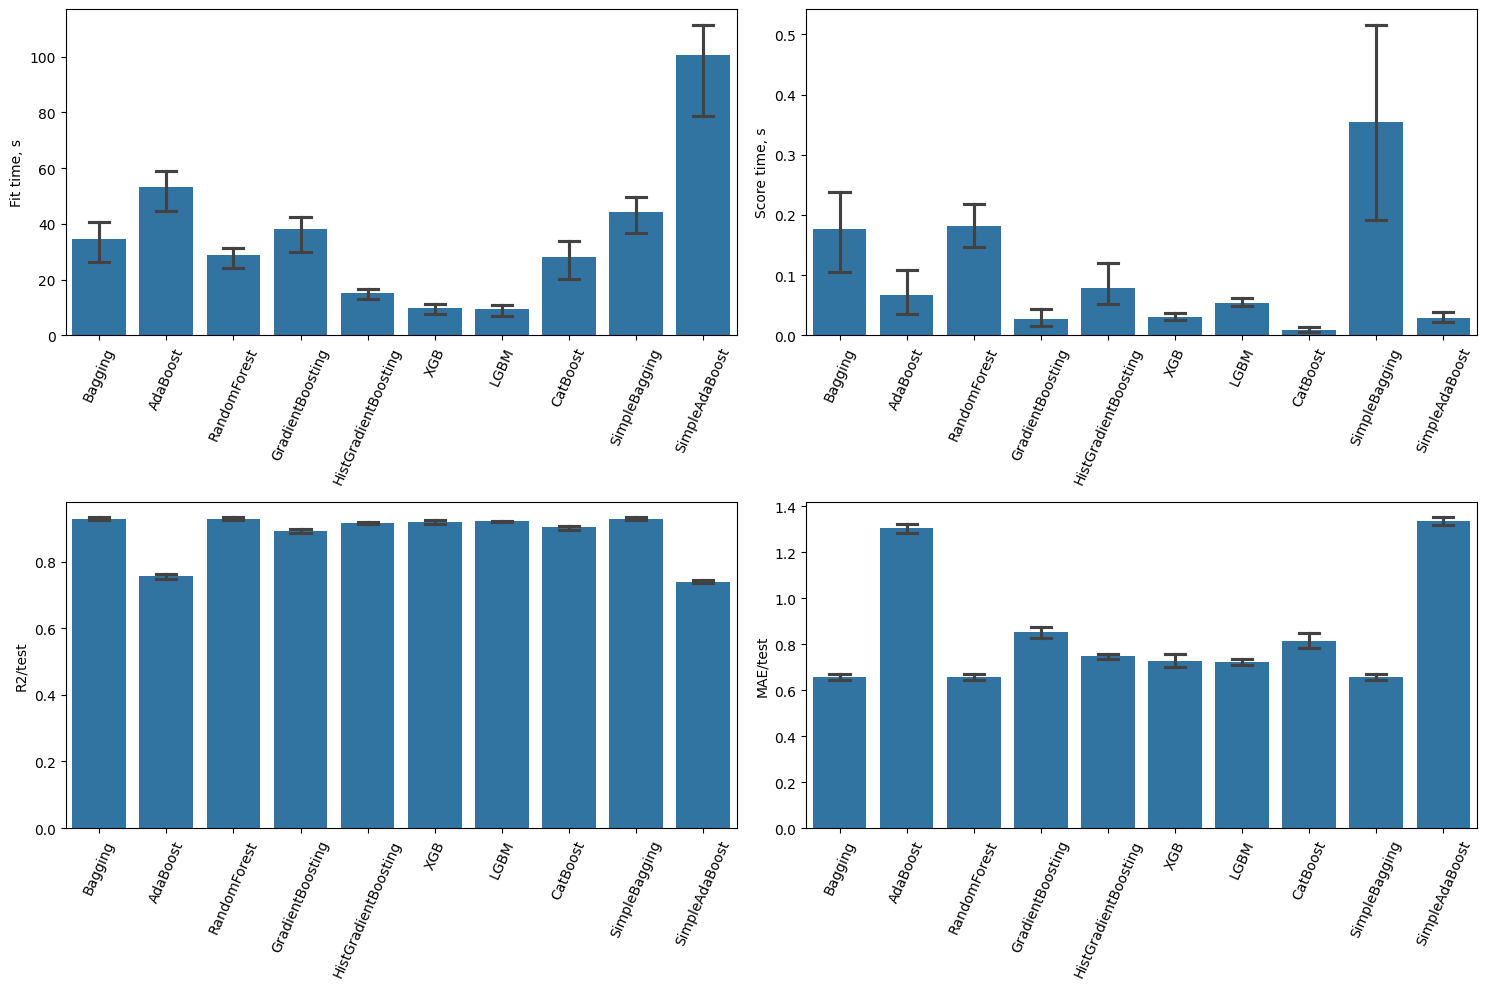

In [103]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for y, ax in zip(["Fit time, s", "Score time, s", "R2/test", "MAE/test"], axs.flatten()):
    sns.barplot(results[["Regressor", y]], x="Regressor", y=y, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=66)
    ax.set_xlabel(None)
fig.tight_layout()
plt.show()

Как видно по графикам, наиболее высокую точность показали SimpleBagging, Bagging, RandomForest, а самыми эффективными оказались XGB, LGBM.